# Importing and Basic EDA

Problem Statement:

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [144]:
!gdown 1LPIrQfiPOdcOiFZ1NkvD8mqO3gTI6MY-

Downloading...
From: https://drive.google.com/uc?id=1LPIrQfiPOdcOiFZ1NkvD8mqO3gTI6MY-
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 33.5MB/s]


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('/content/bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [148]:
df.shape

(10886, 12)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [150]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [151]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [152]:
df.duplicated().value_counts()

,count
False,10886


Let's first convert the datetime column to datetime format.

In [153]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Now Let's make new features from datetime:
- Year
- Month
- Day
- Hour

In [155]:
df['Year'] = df['datetime'].dt.year
df['Month'] = df['datetime'].dt.month
df['Day_of_month'] = df['datetime'].dt.day
df['Hour'] = df['datetime'].dt.hour

In [156]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day_of_month,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


Let's check for outliers:

In [157]:
var_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

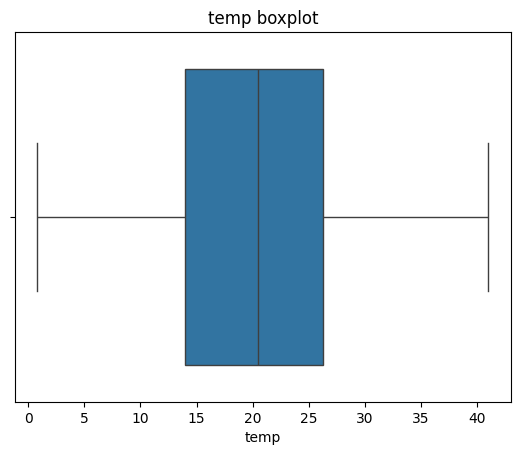

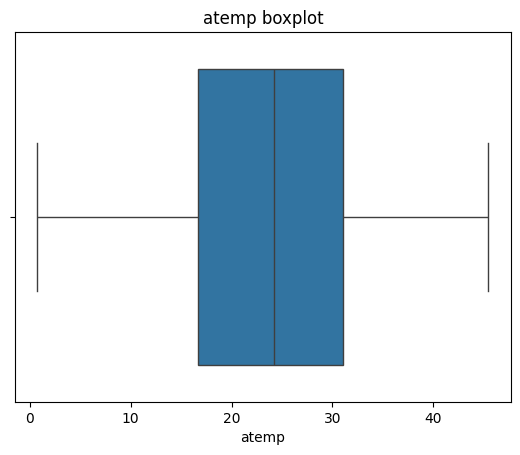

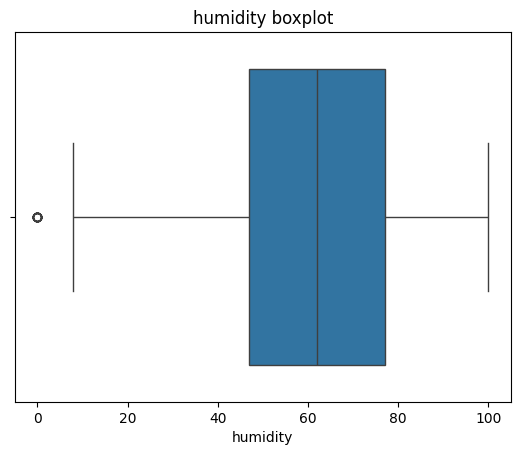

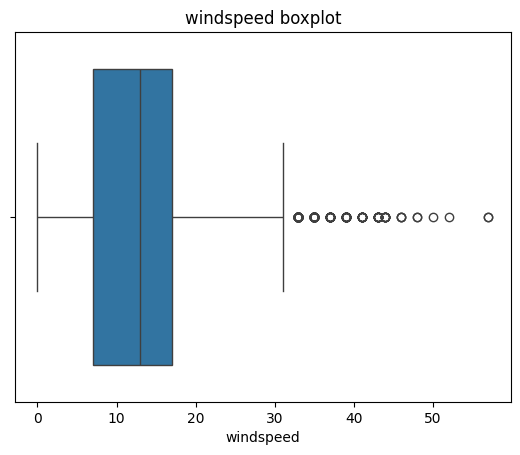

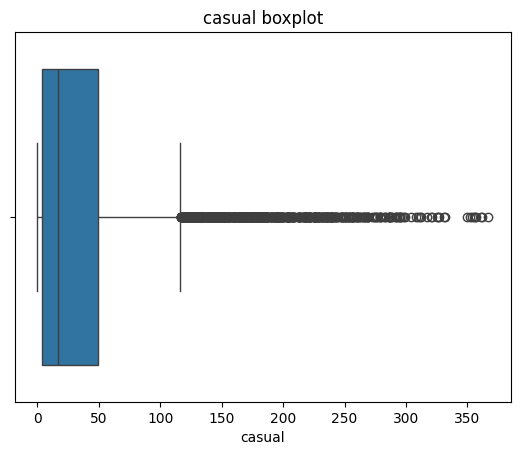

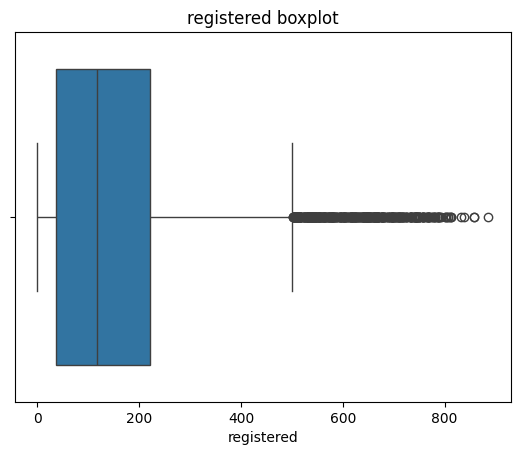

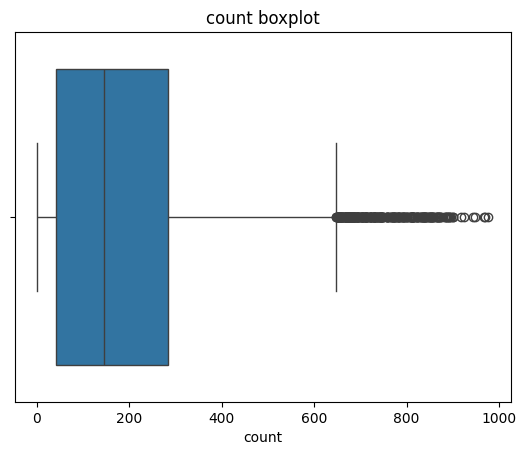

In [158]:
for col in var_col:
  plt.title(f'{col} boxplot')
  sns.boxplot(data=df, x=col)
  plt.show()

In [159]:
df['windspeed'].max()

56.9969

We do not treat outliers in this case, because:

- Windspeed: outlier may show some extreme weather events.
- Count: This is the target column, better to not treat it.

Now Let's check some distributions:

      casual  registered
Year                    
2011  155817      626162
2012  236318     1067179


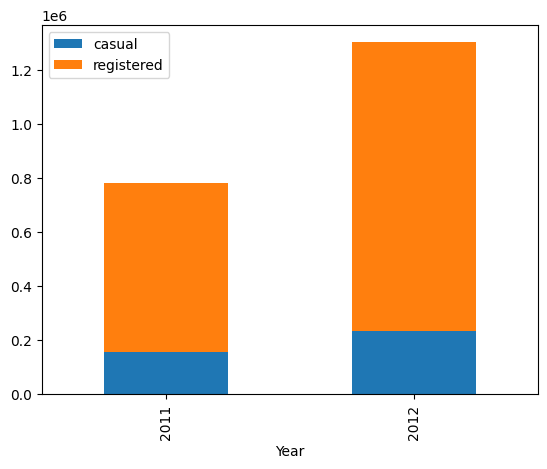

In [160]:
print(df.groupby('Year')[['casual', 'registered']].sum())
df.groupby('Year')[['casual', 'registered']].sum().plot(kind='bar', stacked=True)
plt.show()

We can see increase in both registered and casual users from year 2011 to 2012.

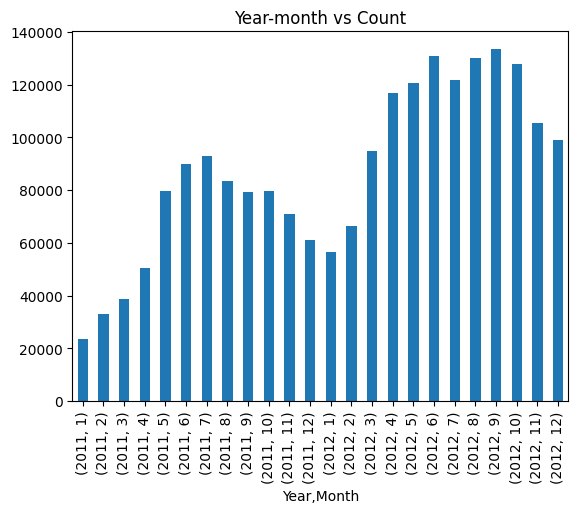

In [161]:
plt.title('Year-month vs Count')
df.groupby(['Year', 'Month'])['count'].sum().plot(kind='bar')
plt.show()

The plot suggests the presence of seasonal variation in user demand. To verify whether this observed dip is driven by seasonal or weather-related factors, we will conduct hypothesis tests to identify the root cause.

       casual  registered
Month                    
1        7252       72632
2        9297       89816
3       25056      108445
4       39813      127589
5       41285      158862
6       48574      172159
7       50947      163670
8       45870      167646
9       45901      166628
10      38087      169347
11      25353      151087
12      14700      145460


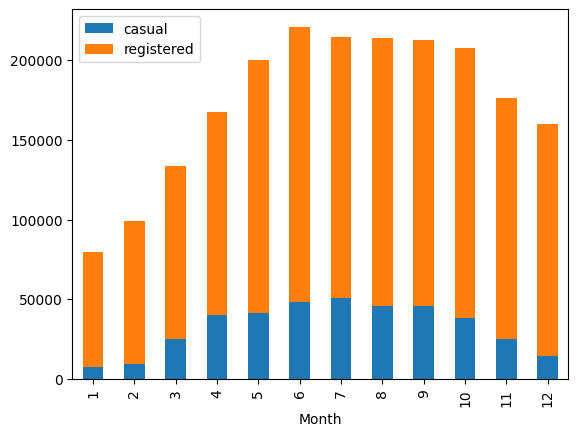

In [162]:
print(df.groupby('Month')[['casual', 'registered']].sum())
df.groupby('Month')[['casual', 'registered']].sum().plot(kind='bar', stacked=True)
plt.show()

      casual  registered
Hour                    
0       4692       20396
1       2957       12415
2       2159        8100
3       1161        3930
4        558        2274
5        658        8277
6       1888       32810
7       4966       92002
8       9802      155258
9      14085       86825
10     20984       58683
11     27324       68533
12     31387       85581
13     33771       83780
14     34925       76085
15     34669       81291
16     34238      110028
17     34401      179356
18     27997      168475
19     22378      121389
20     16750       87454
21     13027       66030
22     10307       50604
23      7051       33765


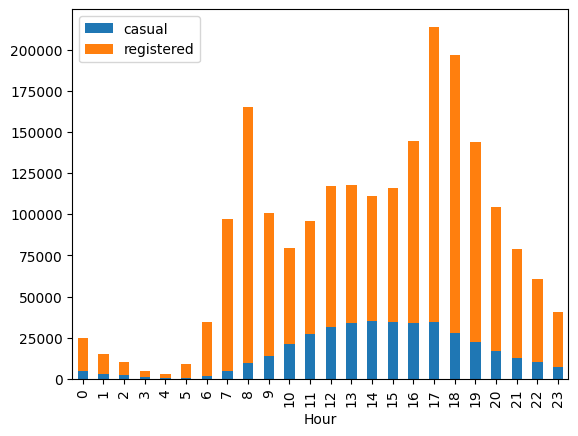

In [163]:
print(df.groupby('Hour')[['casual', 'registered']].sum())
df.groupby('Hour')[['casual', 'registered']].sum().plot(kind='bar', stacked=True)
plt.show()

The plot shows clear spikes in registered users around 8 AM and again at 5–6 PM, possibly indicating commuting patterns among office-goers.

        casual  registered
season                    
1        41605      270893
2       129672      458610
3       142718      497944
4        78140      465894


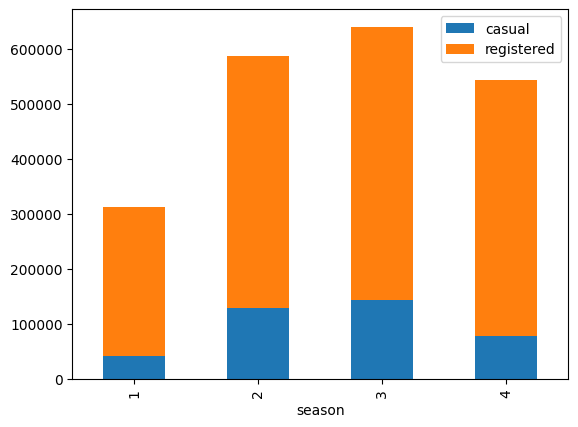

In [164]:
print(df.groupby('season')[['casual', 'registered']].sum())
df.groupby('season')[['casual', 'registered']].sum().plot(kind='bar', stacked=True)
plt.show()

         casual  registered
holiday                    
0        376964     1650704
1         15171       42637


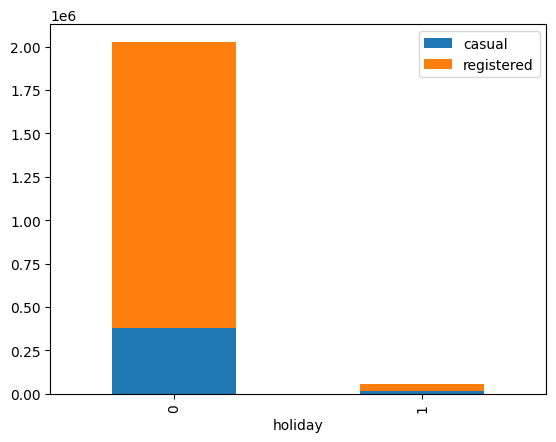

In [165]:
print(df.groupby('holiday')[['casual', 'registered']].sum())
df.groupby('holiday')[['casual', 'registered']].sum().plot(kind='bar', stacked=True)
plt.show()

         casual  registered
weather                    
1        289900     1186163
2         87246      419914
3         14983       87106
4             6         158


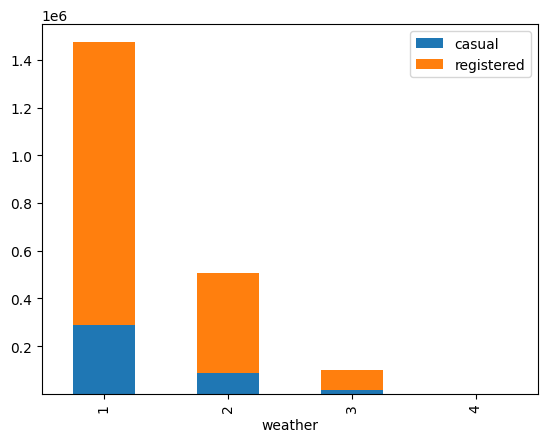

In [166]:
print(df.groupby('weather')[['casual', 'registered']].sum())
df.groupby('weather')[['casual', 'registered']].sum().plot(kind='bar', stacked=True)
plt.show()

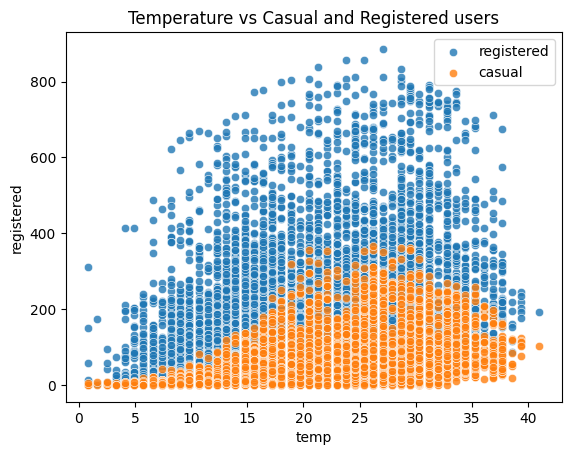

In [167]:
plt.title('Temperature vs Casual and Registered users')
sns.scatterplot(data=df, x='temp', y='registered', label='registered', alpha=0.8)
sns.scatterplot(data=df, x='temp', y='casual', label='casual', alpha=0.8)
plt.legend()
plt.show()

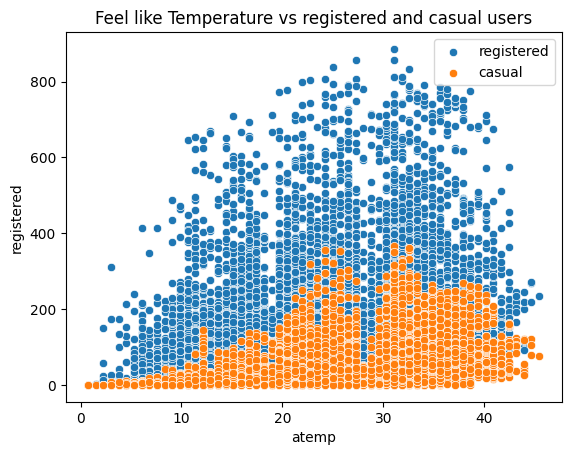

In [168]:
plt.title('Feel like Temperature vs registered and casual users')
sns.scatterplot(data=df, x='atemp', y='registered', label='registered')
sns.scatterplot(data=df, x='atemp', y='casual', label='casual')
plt.show()

- From the above plot we can see some kind of positive correlation between temperature and counts.
- It is also interesting to note that datapoints with very high counts fall between 20-30, maybe because >30 is too hotter than optimum temperature.

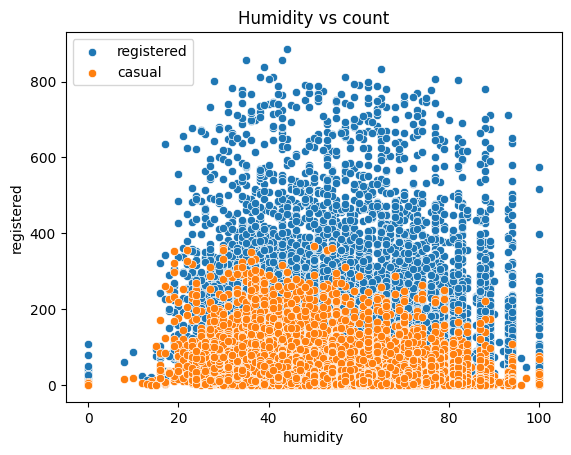

In [169]:
plt.title('Humidity vs count')
sns.scatterplot(data=df, x='humidity', y='registered', label='registered')
sns.scatterplot(data=df, x='humidity', y='casual', label='casual')
plt.show()

Above scatterplot is indicating no to little negative correlation between humidity and count.

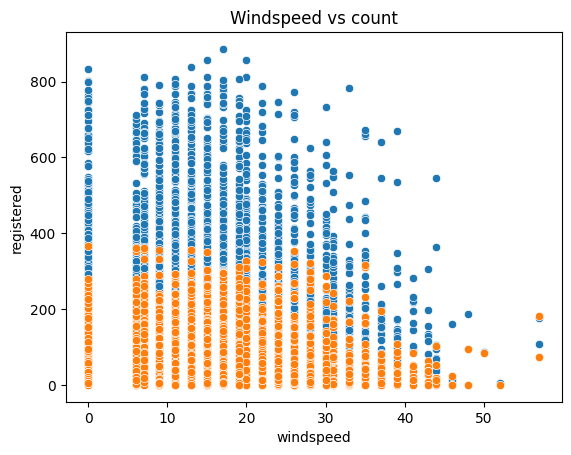

In [170]:
plt.title('Windspeed vs count')
sns.scatterplot(data=df, x='windspeed', y='registered')
sns.scatterplot(data=df, x='windspeed', y='casual')
plt.show()

- Here we can observe negative correlation.
- Possibly too windy is not ideal for biking.

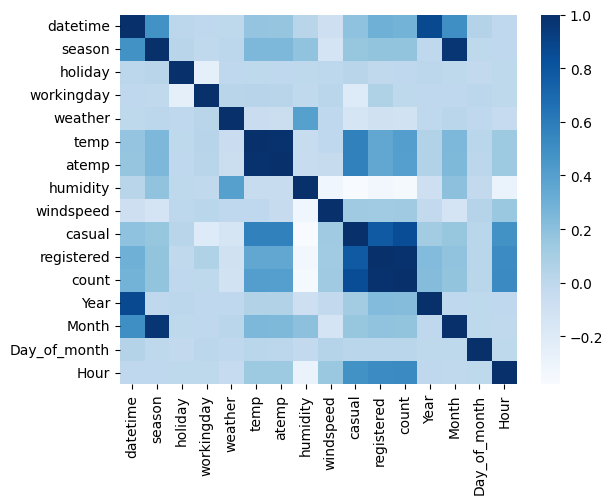

In [171]:
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='Blues')
plt.show()

From the heatmap, we can observe that:

- Temperature shows a positive correlation with total rentals, indicating that warmer conditions likely encourage more bike usage.

- Humidity appears to have a weak to slightly negative correlation with demand, suggesting that overly humid conditions may discourage riders.

- Casual and registered users are strongly correlated, which makes sense — when conditions are favorable, both segments tend to increase their usage together.

# Hypothesis Testing

## Working days vs non-working days.

Let's evaluate whether the number of users on working days differs statistically from the number of users on non working days.

H0 : Mean number of users are same on working days and non wroking days.

Ha : Mean number of users working days are not equal to mean number of users on non-working days.

**Two tailed independant T-test**

In [172]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day_of_month,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [173]:
from scipy.stats import ttest_ind

df_working_count = df[df['workingday']==1]['count']
df_nonworking_count = df[df['workingday']==0]['count']

tstat, pvalue = ttest_ind(df_working_count, df_nonworking_count)
tstat, pvalue

(np.float64(1.2096277376026694), np.float64(0.22644804226361348))

Let's take the signicance level alpha = 0.05

In [174]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


Based on the t-test (p-value ≈ 0.23), we fail to reject the null hypothesis, indicating that there is no statistically significant difference between working days and non-working days.

## Holiday vs non-holiday

H0 : Mean number of users are same on holidays and not holidays.

Ha : Mean number of users holidays are not equal to mean number of users on not holiday.

**Two tailed independant T-test**

In [175]:
df_holiday_count = df[df['holiday']==1]['count']
df_notholiday_count = df[df['holiday']==0]['count']

tstat, pvalue = ttest_ind(df_holiday_count, df_notholiday_count)
tstat, pvalue

(np.float64(-0.5626388963477119), np.float64(0.5736923883271103))

In [176]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


With a p-value of 0.57, we fail to reject the null hypothesis, suggesting that user counts do not differ significantly between holidays and non-holidays.

## Weather Conditions vs Count

In [177]:
df['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


There is only one datapoint for weather condition 4. Let's drop it since it is not a distribution.

weather:

1: Clear, Few clouds, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
Scattered clouds

4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

H0: Weather conditions have no effect on the number of users.

Ha: Weather conditions have a significant effect on the number of users.

**One way ANOVA test**

In [178]:
df_weather_1 = df[df['weather']==1]['count']
df_weather_2 = df[df['weather']==2]['count']
df_weather_3 = df[df['weather']==3]['count']

Let's first check the assumptions before preforming ANOVA one way.

Assumption 1: Normality of different distributions.

H0: Data is normally distributed.

Ha: Distribution is not normal.

In [179]:
from scipy.stats import shapiro

variables = [df_weather_1, df_weather_2, df_weather_3]

for i in range(len(variables)):
  stat, pvalue = shapiro(variables[i])
  print('-'*50)
  print(f'P-value for Weather {i+1}: ', pvalue)
  if pvalue < 0.05:
    print(f'Weather {i+1} distribution in not normal.')
  else:
    print(f'Weather{i+1} distribution is normal.')
  print('-'*50)
  print()

--------------------------------------------------
P-value for Weather 1:  1.5964921477006555e-57
Weather 1 distribution in not normal.
--------------------------------------------------

--------------------------------------------------
P-value for Weather 2:  9.777839106111785e-43
Weather 2 distribution in not normal.
--------------------------------------------------

--------------------------------------------------
P-value for Weather 3:  3.875893017396149e-33
Weather 3 distribution in not normal.
--------------------------------------------------



Test of normality fails, since distributions are not normal, it is not the best approach to go with one-way ANOVA.

Let' check the second Assumption:
Homogeniety of variance.

H0: The variances across groups are equal.

Ha: At least one group has a different variance.

In [180]:
from scipy.stats import levene

stats, pvalue = levene(df_weather_1, df_weather_2, df_weather_3)
stats, pvalue

(np.float64(81.67574924435011), np.float64(6.198278710731511e-36))

In [181]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


Second assumption also fails, suggesting the variance are not homogeneous.

Since the normality and variance assumptions were not satisfied, the Kruskal–Wallis test is a more appropriate alternative.

In [182]:
from scipy.stats import kruskal

stat, pvalue = kruskal(df_weather_1, df_weather_2, df_weather_3, df_weather_4)
stat, pvalue

(np.float64(205.00216514479087), np.float64(3.501611300708679e-44))

In [183]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


The extremely small p-value (~3.5e-44) indicates strong statistical evidence that weather conditions significantly influence user demand.

## Seasons vs Count

In [184]:
df['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


Season:

1: spring

2: summer

3: fall

4: winter

In [185]:
spring = df[df['season']==1]['count']
summer = df[df['season']==2]['count']
fall = df[df['season']==3]['count']
winter = df[df['season']==4]['count']

H0: Seasons have no effect on the number of users.

Ha: Seasons have a significant effect on the number of users.

Let's first check the assumptions before preforming ANOVA one way.

Assumption 1: Normality of different distributions.

H0: Data is normally distributed.

Ha: Distribution is not normal.

In [186]:
from scipy.stats import shapiro

variables = [spring, summer, fall, winter]

for i in range(len(variables)):
  stat, pvalue = shapiro(variables[i])
  print('-'*50)
  print(f'P-value for Season {i+1}: ', pvalue)
  if pvalue < 0.05:
    print(f'Season {i+1} distribution in not normal.')
  else:
    print(f'Season {i+1} distribution is normal.')
  print('-'*50)
  print()

--------------------------------------------------
P-value for Season 1:  8.749584618867662e-49
Season 1 distribution in not normal.
--------------------------------------------------

--------------------------------------------------
P-value for Season 2:  6.039374406270491e-39
Season 2 distribution in not normal.
--------------------------------------------------

--------------------------------------------------
P-value for Season 3:  1.043680518918597e-36
Season 3 distribution in not normal.
--------------------------------------------------

--------------------------------------------------
P-value for Season 4:  1.1299244409282836e-39
Season 4 distribution in not normal.
--------------------------------------------------



Test of normality fails, since distributions are not normal, it is not the best approach to go with one-way ANOVA.

Let' check the second Assumption:
Homogeniety of variance.

H0: The variances across groups are equal.

Ha: At least one group has a different variance.

In [187]:
from scipy.stats import levene

stats, pvalue = levene(spring, summer, fall, winter)
stats, pvalue

(np.float64(187.7706624026276), np.float64(1.0147116860043298e-118))

In [188]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


Second assumption also fails, suggesting the variance are not homogeneous.

Since the normality and variance assumptions were not satisfied, the Kruskal–Wallis test is a more appropriate alternative.

In [189]:
from scipy.stats import kruskal

stats, pvalue = kruskal(spring, summer, fall, winter)
stats, pvalue

(np.float64(699.6668548181988), np.float64(2.479008372608633e-151))

In [190]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


The extremely small p-value (~2.47e-151) indicates strong statistical evidence that Seasons significantly influence user demand.

## Seasons and Weather Conditions

Let's consider weather=4 an outlier because only only one datapoint contains that value.

In [191]:
df.drop(df[df['weather']==4].index, inplace=True)

To examine the relationship between weather and season, we perform a **chi-square test**.

In [192]:
df_weather_season = pd.crosstab(df['weather'], df['season'])

H0: There is no significant association between weather and season.

Ha: There is significant association between weather and season.

In [193]:
from scipy.stats import chi2_contingency

stats, pvalue, dof, expected_freq = chi2_contingency(df_weather_season)
stats, pvalue

(np.float64(46.101457310732485), np.float64(2.8260014509929403e-08))

In [194]:
alpha = 0.05

if pvalue < alpha:
  print('We reject the null hypothesis.')

else:
  print('We failed to reject the null hypothesis.')

We reject the null hypothesis.


The p-value (~2.8e-08) indicates strong evidence of association, suggesting that weather and season are significantly related.

# Report

Our analysis focuses on examining whether seasonality, weather, or calendar-based attributes (holidays/working days) impact customer usage patterns.


- Weather and season significantly drive user demand variance.

- Calendar variables like holidays or working days do not.

- The monthly dip was a reflection of seasonal weather patterns, not operational or behavioral disruption.

Recommendation:

- Introduce weather-adjusted pricing
  * Discounts during off-season months
  * Surge pricing (or availability expansion) during ideal conditions.

- Weather-resilient strategy
  * Offer rain protection kits or ponchos
  * Communicate predictive usage insights to users via app.